In [1]:
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [2]:
wine = load_wine()

In [3]:
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [4]:
import pandas as pd
pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)],axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [5]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [6]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [7]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(wine.data,wine.target,test_size=0.3)


In [8]:
Xtrain.shape

(124, 13)

In [22]:
wine.data.shape

(178, 13)

In [43]:
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                 ## 两个随机：
                                 ,random_state=30 # data的随机选择，输入一个确定的数会让模型更稳定
                                 ,splitter="random" # 选取特征的方式，使用random是防止过拟合的一种方式，树会变得更深
                                 ## 剪枝参数:
                                 ,max_depth=3 
            #                      ,min_samples_leaf=10
            #                      ,min_samples_split=10
#                                   ,max_feature = 10 # 最大特征使用数，超过该值后将强行停止树生长，但可能导致训练不足
#                                   ,min_impurity_decrease = 5 # 不纯度降低值小于该值则不进行分支
                                 )
clf = clf.fit(Xtrain,Ytrain)
score = clf.score(Xtest,Ytest)

In [44]:
score

0.9444444444444444

In [45]:
import graphviz

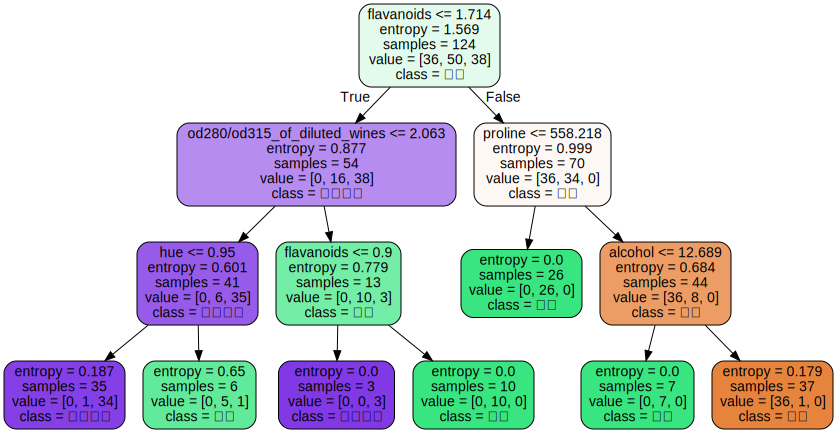

In [46]:
dot_data = tree.export_graphviz(clf
                               ,feature_names = wine.feature_names # 为每一个特征加一个名字，否则在图中只有数组加下标的形式
                               ,class_names=["琴酒","雪莉","贝尔摩德"] # 为标签加一个名字，否则只以1，2，3标识
                               ,filled=True #标识颜色，颜色越深，entropy或gini越小
                               ,rounded=True # 圆角节点图标
                               )
graph = graphviz.Source(dot_data)
graph

In [14]:
clf.feature_importances_

array([0.07432585, 0.        , 0.        , 0.        , 0.01855008,
       0.        , 0.45901475, 0.        , 0.02980695, 0.        ,
       0.0728389 , 0.07979747, 0.265666  ])

In [15]:
[*zip(wine.feature_names,clf.feature_importances_)]

[('alcohol', 0.07432584947136536),
 ('malic_acid', 0.0),
 ('ash', 0.0),
 ('alcalinity_of_ash', 0.0),
 ('magnesium', 0.01855007583928943),
 ('total_phenols', 0.0),
 ('flavanoids', 0.45901475150348564),
 ('nonflavanoid_phenols', 0.0),
 ('proanthocyanins', 0.02980694877453304),
 ('color_intensity', 0.0),
 ('hue', 0.07283890141068071),
 ('od280/od315_of_diluted_wines', 0.07979746875670102),
 ('proline', 0.2656660042439448)]

# 绘制超参数曲线 
    考量不同参数下模型效果的曲线 

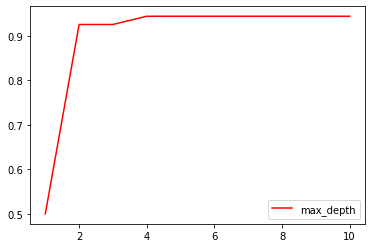

In [52]:
import matplotlib.pyplot as plt

test_scores = []
for i in range(0,10):
    clf = tree.DecisionTreeClassifier(max_depth=i+1
                                     ,criterion="entropy"
                                     ,random_state=30).fit(Xtrain,Ytrain)
    test_scores.append(clf.score(Xtest,Ytest))
    
plt.plot(range(1,11),test_scores,color="red",label="max_depth")
plt.legend()
plt.show()